# Génération de la Frontière Efficiente de Markowitz

Ce notebook illustre l'utilisation de la méthode de scalarisation pour approximer la frontière efficiente d'un portefeuille d'actions.


In [ ]:
import matplotlib.pyplot as plt
from scipy.constants import sigma
from scipy.optimize import minimize
import os

from level1.functions import *

# Charger les données
df = load_datas()

In [ ]:
df

In [ ]:
# Calcul des rendements logarithmiques
returns = f_returns_on_df(df)

# Calcul des paramètres pour l'optimisation
mu = f_mu_on_df(returns)  # Annualisation (252 jours boursiers)
Sigma = f_sigma_on_df(returns)  # Annualisation de la matrice de covariance
num_assets = len(mu)

# Calcul des Paramètres d'Optimisation

Les rendements logarithmiques sont calculés comme :

$  r_t = \ln\left(\frac{P_t}{P_{t-1}}\right) $

Le vecteur des rendements moyens annualisés :

$ \mu = \frac{1}{T} \sum_{t=1}^T r_t \times 252 $

La matrice de covariance annualisée :

$ \Sigma = \frac{1}{T} \sum_{t=1}^T (r_t - \bar{r})(r_t - \bar{r})^T \times 252 $


# Méthode de résolution par scalarisation pour générer la frontière efficiente

Fonction rendement : $ F_1(w) = - (w^T \mu) $

Fonction risque : $ F_2(w) = w^T \Sigma w $

Fonction objectif scalarisée : $ F(w) = \lambda \cdot (w^T \Sigma w) - (1 - \lambda) \cdot (w^T \mu) $

In [4]:
lambdas = np.linspace(0, 1, 50)  # 100 points entre 0 et 1
frontier_yields, frontier_volatility, frontier_weights = optimize_portfolio(lambdas, mu, Sigma)

# Génération de la Frontière Efficiente

En faisant varier $ \lambda\ $ de 0 à 1, nous obtenons différents portefeuilles optimaux.


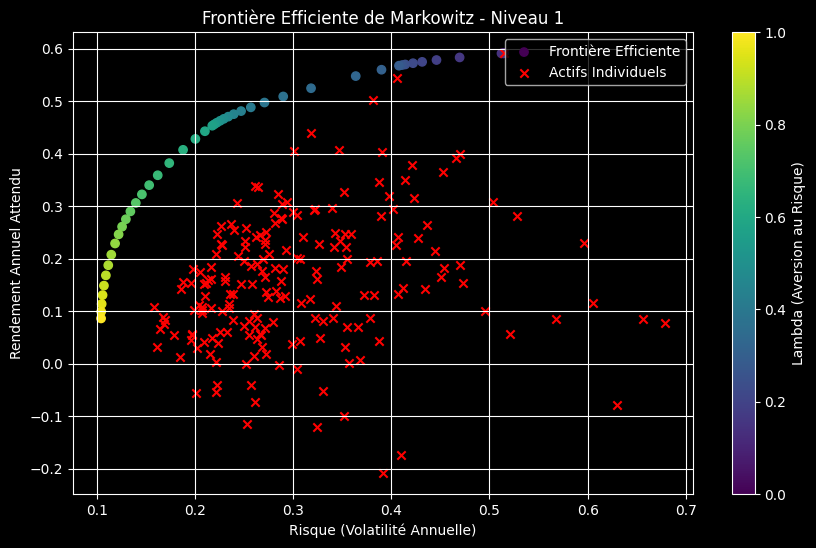

In [5]:
# Tracer la frontière efficiente
plt.figure(figsize=(10, 6))
plt.scatter(frontier_volatility, frontier_yields, c=lambdas, cmap='viridis', label='Frontière Efficiente')
plt.scatter(np.sqrt(np.diag(Sigma)), mu, c='red', marker='x', label='Actifs Individuels')
plt.colorbar(label='Lambda (Aversion au Risque)')
plt.xlabel('Risque (Volatilité Annuelle)')
plt.ylabel('Rendement Annuel Attendu')
plt.title('Frontière Efficiente de Markowitz - Niveau 1')
plt.grid(True)
plt.legend()
plt.show()

In [6]:
print("Le portefeuille avec le rendement le plus élevé :")
max_return_index = np.argmax(frontier_yields)
print(f"Rendement : {frontier_yields[max_return_index]:.4f}, Volatilité : {frontier_volatility[max_return_index]:.4f}")
weights = frontier_weights[max_return_index]
weights[weights < 1e-4] = 0  # Nettoyer les poids très faibles pour l'affichage
print(f"Actifs sélectionnés :")
for i, weight in enumerate(weights):
    if weight > 0:
        print(f"  {df.columns[i]} : {weight:.4f}")
#print(f"Poids : {weights}")

print("\nLe portefeuille avec le risque le plus faible :")
min_risk_index = np.argmin(frontier_volatility)
print(f"Rendement : {frontier_yields[min_risk_index]:.4f}, Volatilité : {frontier_volatility[min_risk_index]:.4f}")
weights = frontier_weights[min_risk_index]
weights[weights < 1e-4] = 0  # Nettoyer les poids très faibles pour l'affichage
print(f"Actifs sélectionnés :")
for i, weight in enumerate(weights):
    if weight > 0:
        print(f"  {df.columns[i]} : {weight:.4f}")
#print(f"Poids : {weights}")

Le portefeuille avec le rendement le plus élevé :
Rendement : 0.5910, Volatilité : 0.5145
Actifs sélectionnés :
  NVDA : 1.0000

Le portefeuille avec le risque le plus faible :
Rendement : 0.0861, Volatilité : 0.1043
Actifs sélectionnés :
  PANW : 0.0114
  TSM : 0.0451
  CRWD : 0.0039
  VZ : 0.0837
  EA : 0.0548
  TTWO : 0.0264
  MCD : 0.0748
  HLT : 0.0004
  ORLY : 0.0289
  WMT : 0.0766
  MO : 0.0133
  PM : 0.0065
  KMB : 0.0519
  CL : 0.0418
  GIS : 0.0049
  KR : 0.0237
  CPB : 0.0378
  CHD : 0.0162
  XOM : 0.0299
  TRV : 0.0048
  JNJ : 0.1134
  PFE : 0.0165
  MRK : 0.0684
  ABBV : 0.0149
  BMY : 0.0261
  HUM : 0.0164
  LMT : 0.0880
  LUV : 0.0008
  OTIS : 0.0003
  O : 0.0151
  DUK : 0.0035
